In [3]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches

# Marginal Abatement Cost Curves

**Marginal Cost**

As of know, you should be familiar with the economic concept of **marginal cost**. The classical textbook example is a production factory, so let's call ours Peter's Pens Limited. Whenever Peter's Pens' management is deciding whether or not to increase production to maximize their profit, they observe the firm's marginal cost: the change in its **total cost** that occurs as 1 more pen is produced. In this case, we measure the marginal cost in $ / per extra pen produced. In environmental economics, we talk about the **marginal cost of emissions** and the **marginal cost of emission abatement**. We think of it as follows:

$$ \text{MC of Emissions (\$/ton)} = \frac{\text{$\Delta$ Cost of Emissions (\$)}}{\text{$\Delta$ Quantity of Emissions (tons)}}$$

And: 

$$ \text{MC of Emission Abatement (\$/ton)} = \frac{\text{$\Delta$ Cost of Emissions Abatement (\$)}}{\text{$\Delta$ Quantity of Emission Abated (tons)}}$$
 
**Government Intervention**

Let's say that Peter's Pens Limited is operating in a market where the government aims to make firms **internalize** the negative externality created by $CO_2$ pollution from their production. From earlier, we know that the government may choose between **prescriptive** or **market-based** policies, but for this case we assume they chose the latter. In that case, the government introduces a *Pigouvian tax* on per ton of $CO_2$ emitted from all firms. As any Pigouvian tax, its rate is set to the *social marginal cost of the negative externality* it is set to internalize. This is the *social cost of carbon*, quantified by extensive research. In the big picture, it pushes the private marginal cost towards the higher social marginal cost of emissions. As with any price increase, we assume the ‘supplied’ quantity of emissions to be pushed leftwards (decreased). This results in a new equilibrium quantity of emissions at a higher price (= social marginal cost) and the quantity reached becomes the *optimal quantity* of emissions in society. Now, how does the management of Peter’s Pens Limited react to the new market conditions?


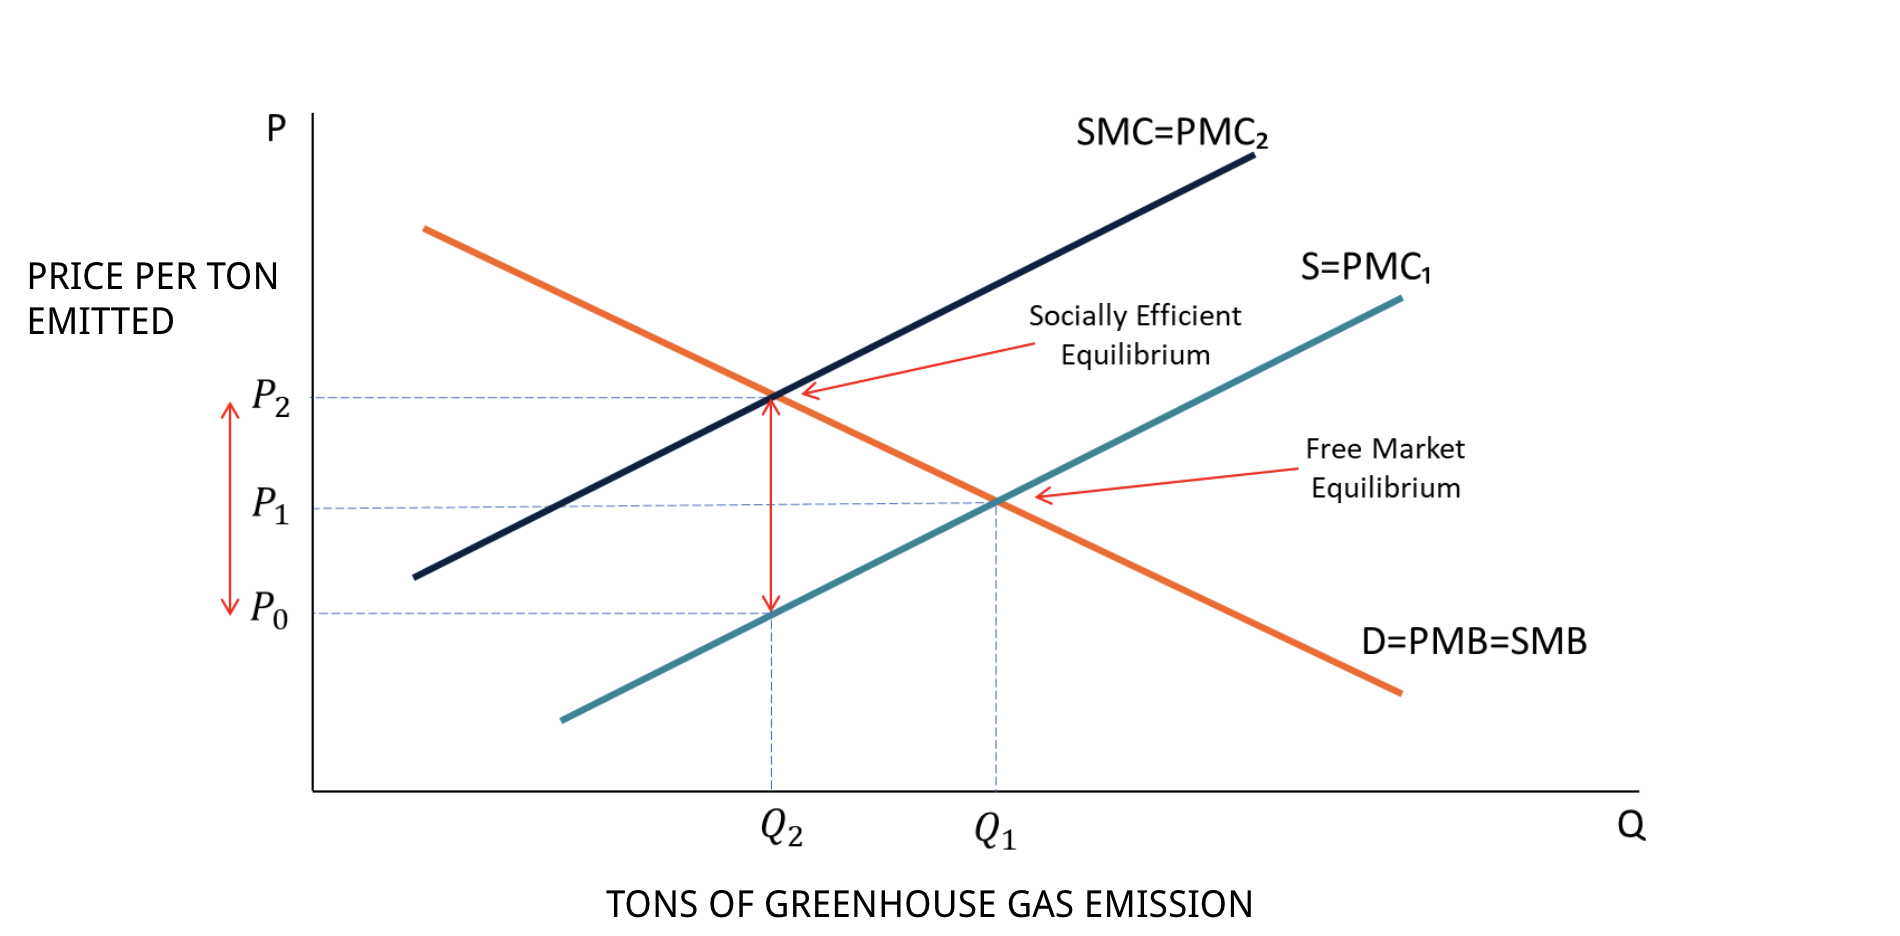

**The Firm’s Reaction**
 
From a ‘bottom-up-perspective’, the management at Peter’s Pens Limited is faced with two choices in reaction to the new emissions tax: The Business-as-Usual (BAU) alternative or the Emissions Abatement alternative. The firm can either choose to continue emitting and pay the tax or invest in new, environmentally friendly technologies that abate their prior $CO_2$ emissions. Any rational decision maker ought to invest in abatement technologies with a marginal cost of abatement up to the emissions tax put in place. Assuming they chose to pursue the latter, how would they scope out worthwhile investments within the firm? By collecting data, of course! Observing the cost and abatement potential of each investment, the firm sorts its options from cheapest to most expensive and starts ‘picking’ the low-hanging fruits of $CO_2$ abatement. At any given carbon tax rate, they reduce their tax bill to $0 and observe their total abatement as the sum of all technologies invested in. The resulting plot: The Marginal Abatement Cost (MAC) Curve of Peter’s Pens Limited. Here's how a simple MAC for Peter's Pens might look:

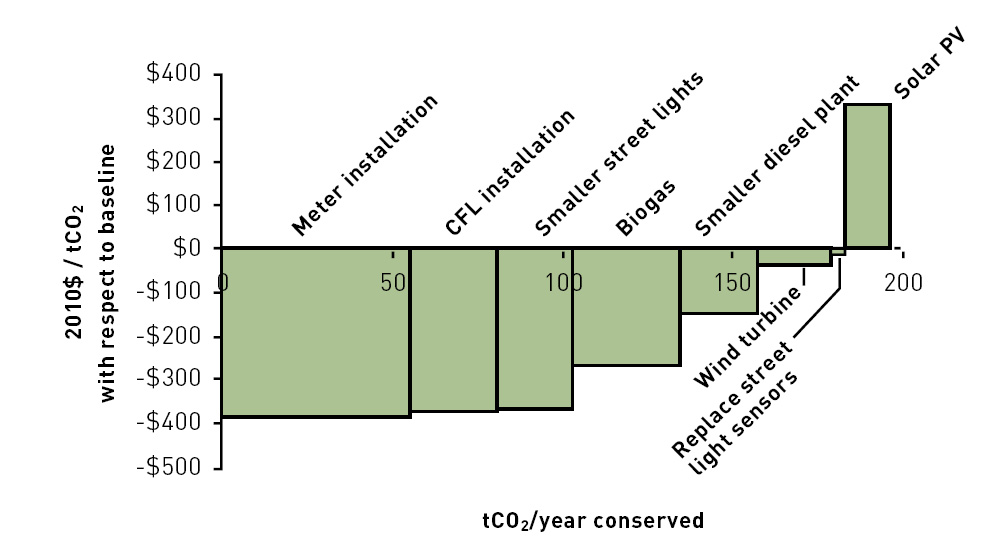

In this example, think of conserved as abatement. Don't worry if it does not make sense quite yet! We are just getting started with the idea.
 
**Back to the Government** 

Returning to the government policymaker’s perspective, we’ve discovered something interesting. Just as Peter’s Pens has their firm-specific MAC, society as a whole has one. Through extensive research on policy and technological interventions, one can quantify the *abatement potential* and the *abatement cost* of technologies (e.g electric cars, wind & solar power generation), policies (e.g fuel standards), and natural restoration projects (e.g organic soil restoration). From here, any policy maker starts ‘picking’ the low-hanging fruits first. Earlier, we described the effect of introducing a tax on the emissions ‘market’ and observed how rational decision-makers in individual firms react by constructing their own MAC curves. Now, let’s say that the government has set an emission reduction target but has not decided on a specific tax rate yet. How could they guarantee that the target is met? By taking the cumulative sum of the abatement potential of each intervention they expect to take place at a given rate, they should keep doing so until their sum equals the emission reduction target. From there, they observe the marginal abatement cost of the last intervention they added to the sum. This should be the emissions tax rate. Here's how a simplified version could look:

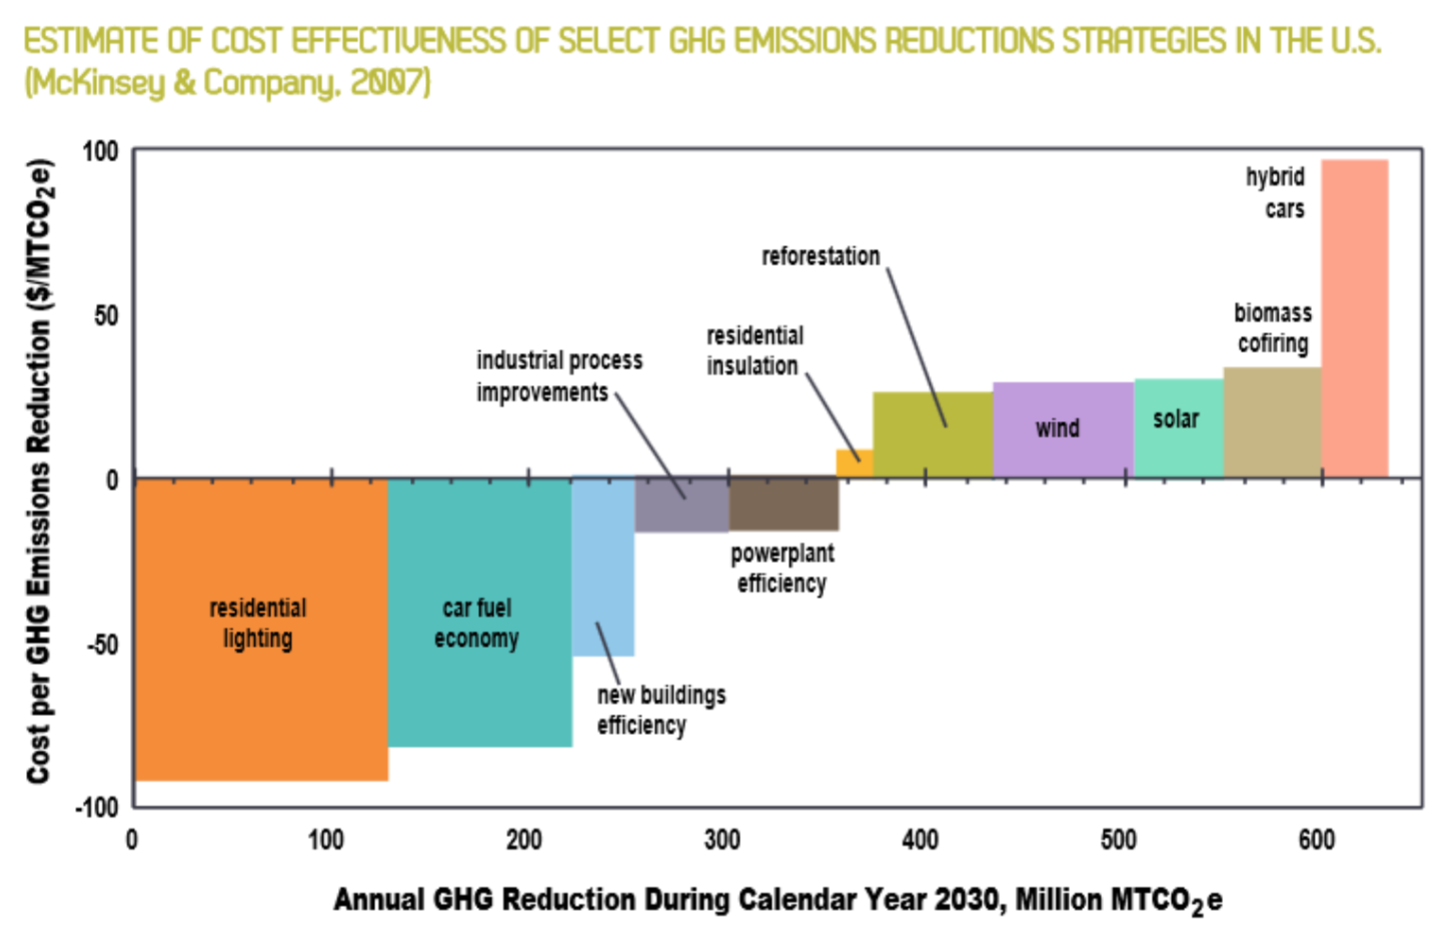

**Conclusion**
 
In conclusion, both an individual firm and society as a whole have MAC curves. By either choosing an emission reduction target or a emissions tax rate, we can arrive at the same level of abatement. Whenever an emission tax is introduced to the market, rational firms build their MAC curves and start investing in the cheapest relevant technologies up to the level of the given tax rate to avoid paying the tax. A rational policy maker will map out the different abatement opportunities in a society as a whole and prioritize the cheapest alternatives. We would stop emissions abatement when the technology or policy we invest in has a higher marginal cost than the societal marginal cost of emissions. From there, any intervention reduces either individual (firm) or societal welfare.
 
Now, let’s delve deeper into the McKinsey MAC curve and build one of our own for Methane Abatement.



## The McKinsey Marginal Abatement Cost Curve (MAC)

As earlier described, the Marginal Abatement Cost Curve gives policy makers and firms an opportunity to differentiate the costs of the multiple approaches we have in reducing our carbon (CO2) emissions. It tells us where we get the best "bang for the buck" when our goal is to abate carbon emissions. The **Abatement Potential (GtCO2 per year)** follows the x-axis, and the ** Marginal Abatement Cost (€ per ton of CO2)** lies on the y-axis.
 
Each rectangle represents a specific technology or policy (e.g switch to LED lights or install Carbon Capture Systems (CCS) in older coal plants). The *wider* the rectangle, the *larger* the abatement potential, and the *taller* the rectangle, the *higher* abatement cost for that specific intervention.
 
Below you'll find the most common MAC's out there, the McKinsey MAC from 2009. It has a society-wide scope. For our own MAC plot, we chose to narrow it down to different methane gas abatement techniques. Take your time to fully grasp what the curve below tells us. What surprises you the most? Imagine being an entrepreneur, policy-maker, or just an environmentally-conscious individual: How could you use the MAC to make informed decisions?

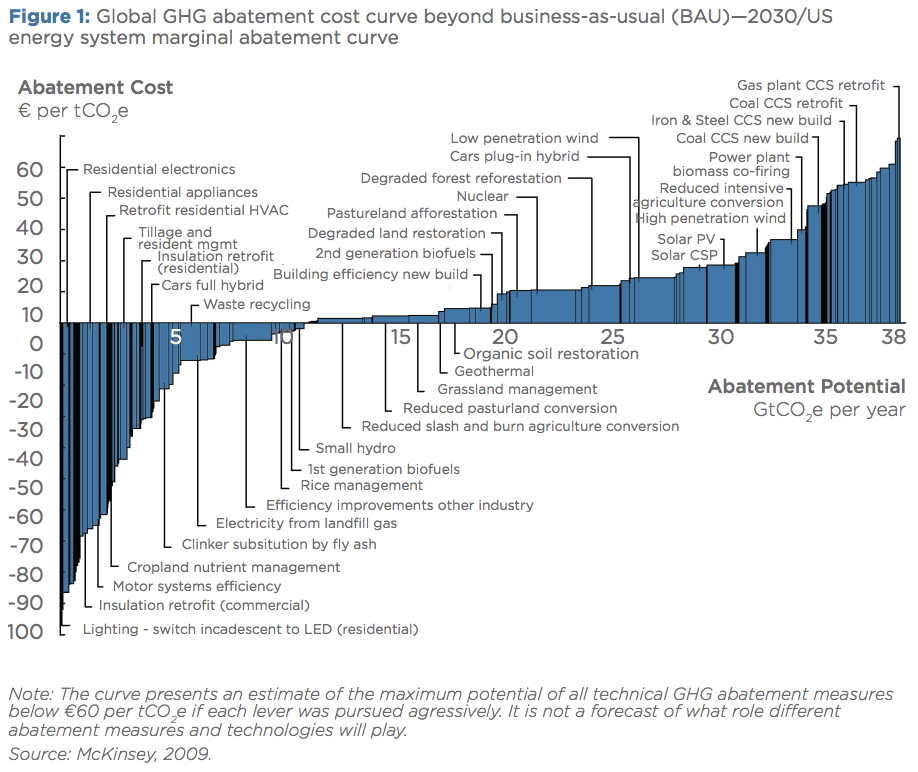

### Why are some costs negative?

Something that understandably strikes a lot of observers from the plot above is the concept of *negative costs*. Take LEDs (about - €100 per tCO2) for instance: The negative cost here entails that for every investment that reduces CO2 from traditional lightning by 1 ton CO2, the investor receives a €100 saving. That's a great deal!
 
The cause of negative costs are disputed, but a commonly used idea is that within our current market model, there exists *inefficiencies* such as lack of incentives or information that prohibit market participants from taking the full advantage of the returns offered from investing in technologies with negative costs.

## Constructing a MAC for Methane Gas Abatement

We start by importing a dataset on methane abatement from the International Environmental Agency (IEA): 

In [4]:
#Create abatement_data table and set upper bound of abatement potential to 200
abatement_table = Table.read_table("abatement_data.csv").where('Cost',are.between(-10.1,10)).where('Possible Savings', are.below(200)).drop('Emissions').relabel('Possible Savings', 'Abatement Potential').relabel('Cost','Abatement Cost')
abatement_table

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


In [5]:
#Select specific region (1/4 of data)
selection = 'Asia Pacific'
Group = abatement_table.where('Region', selection)
Group

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


In [6]:
#The find_x_pos function used for plotting! (out of scope)

def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

In [7]:
#Prepare the data for plotting
width_group = Group.column('Abatement Potential')
height_group = Group.column('Abatement Cost')
new_x_group = find_x_pos(width_group)

With the following function, we introduce an arbritary level of taxation to measure the total abatement outcome later.

In [8]:
#The methane_tax function -- Let's introduce a tax!
def methane_tax(tax, table):
    if tax < min(table.column('Abatement Cost')):
        print("No Abatement")
    else:
        abatement = table.where('Abatement Cost', are.below_or_equal_to(tax))
        total_abatement = sum(abatement.column('Abatement Potential'))
        abatement_technologies = abatement.column('Abatement technology')
        print('Methane tax: ', tax)
        print('Total Abatement: ', total_abatement)
        print("")
        print("Abatement Technologies", abatement_technologies)

Methane: $4
Methane tax:  4
Total Abatement:  4579.399996707216

Abatement Technologies ['Replace pumps' 'Blowdown capture' 'Replace with instrument air systems'
 ... 'Downstream LDAR' 'Replace with electric motor'
 'Replace with electric motor']


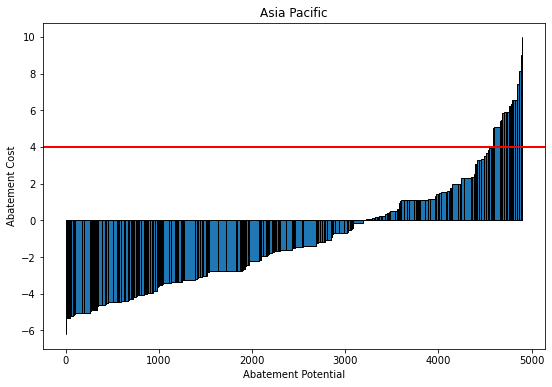

In [9]:
#The group_plot function used for plotting (out of scope)
def group_plot(tax):
    print(f"Methane: ${tax}")
    methane_tax(tax, Group)
    plt.figure(figsize=(9,6))
    plt.bar(new_x_group, height_group,width=width_group,edgecolor = 'black')
    plt.title(selection)
    plt.xlabel('Abatement Potential')
    plt.ylabel('Abatement Cost')
    plt.axhline(y=tax, color='r',linewidth = 2)
    
group_plot(4)

In [10]:
#Prepare data for plotting (second round)
width = abatement_table.column('Abatement Potential')
height = abatement_table.column('Abatement Cost')
new_x = find_x_pos(width)

In [11]:
#Let's give each type of technology a different color!
abatement_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5','#85E827','#F165FD','#1F9F7F','#945CF8','#ff3a1d','#2a8506']
for i in set(abatement_table['Abatement technology']):
    abatement_colors_dict[i] = colors[count]
    count += 1

colors_mapped = list(pd.Series(abatement_table['Abatement technology']).map(abatement_colors_dict))
abatement_table = abatement_table.with_column('Color', colors_mapped)

Methane Tax: $3
Methane tax:  3
Total Abatement:  19371.639972971752

Abatement Technologies ['Replace pumps' 'Blowdown capture' 'Replace with instrument air systems'
 ... 'Install flares' 'Install flares' 'Replace with electric motor']


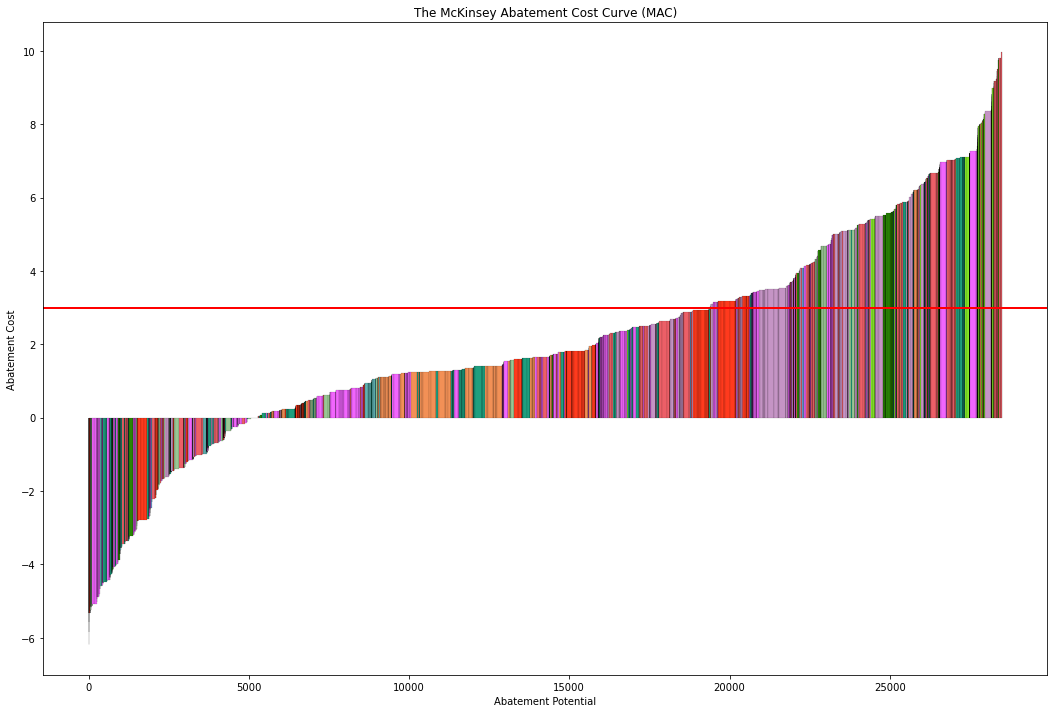

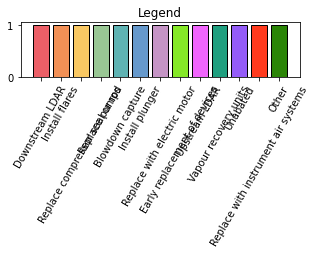

In [12]:
#The Methane curve plot - function!
def mckinsey_curve(tax):
    print(f"Methane Tax: ${tax}")
    methane_tax(tax, abatement_table)
    plt.figure(figsize=(18,12))
    plt.bar(new_x, height, width=width, linewidth=0.1, color=abatement_table['Color'], edgecolor = "black")
    plt.title('The McKinsey Abatement Cost Curve (MAC)')
    plt.xlabel('Abatement Potential')
    plt.ylabel('Abatement Cost')
    plt.axhline(y=tax, color='r', linewidth = 2)

    plt.figure(figsize=(5,1))
    plt.bar(abatement_colors_dict.keys(), 1, color = abatement_colors_dict.values())
    plt.xticks(rotation=60)
    plt.title('Legend')
    
mckinsey_curve(3)

What a plot! From here, we can differentiate the multiple methane abatement technologies on a cost basis, finding the most efficient ways of reducing methane emissions from gas production. We also observe the result of introducing a tax: With a tax of $3 per ton, we expect the total abatement to be almost 20.000 tons within our industry.

## The MAC curve's important limitations

Before moving on to the next topic of this chapter, we ought to consider the drawbacks of our newfound knowledge:

### Limitation 1: Introducing Capital Intensity

From the MAC curve for CO2 (see figure 1), we are interested in finding the **capital intensity of an intervention**. This is different from the **Marginal Abatement Cost**, as it does not take potential savings from e.g lower energy consumption in the future into its calculation. However, it's a great measurement for which technologies require the highest *upfront capital* investment to abate an amount of GHG.


The formula is as follows: 

$$CI = \frac{\text{Additional Investment}}{\text{Lifetime Emissions Savings}}$$

Where Additional Investment is the the additional upfront investment for new technology relative to the Business as Usual (BAU) alternative).

Let's say you buy a Tesla model 3 (EV) instead of a Mercedes S-Class (ICE), then the capital intensity for that car investment is as follows:

In [13]:
MODEL_3_PRICE = 56000
MODEL_3_CO2_KM = 0.092

MERCEDES_S_CLASS_PRICE = 40000
MERCEDES_S_CLASS_CO2_KM = 0.26

LIFETIME_DRIVING = 200000

CAPITAL_INTENSITY = (MODEL_3_PRICE - MERCEDES_S_CLASS_PRICE) / ((MERCEDES_S_CLASS_CO2_KM - MODEL_3_CO2_KM) * LIFETIME_DRIVING)

CAPITAL_INTENSITY * 1000 #Converting kg to ton


476.19047619047615

Hence, we can say that the capital intensity of investing in a Tesla is about 470 USD per ton of $CO_2$ abated.

Had we re-arranged the MAC curve from figure 1 for capital intensity, it would have looked like this:

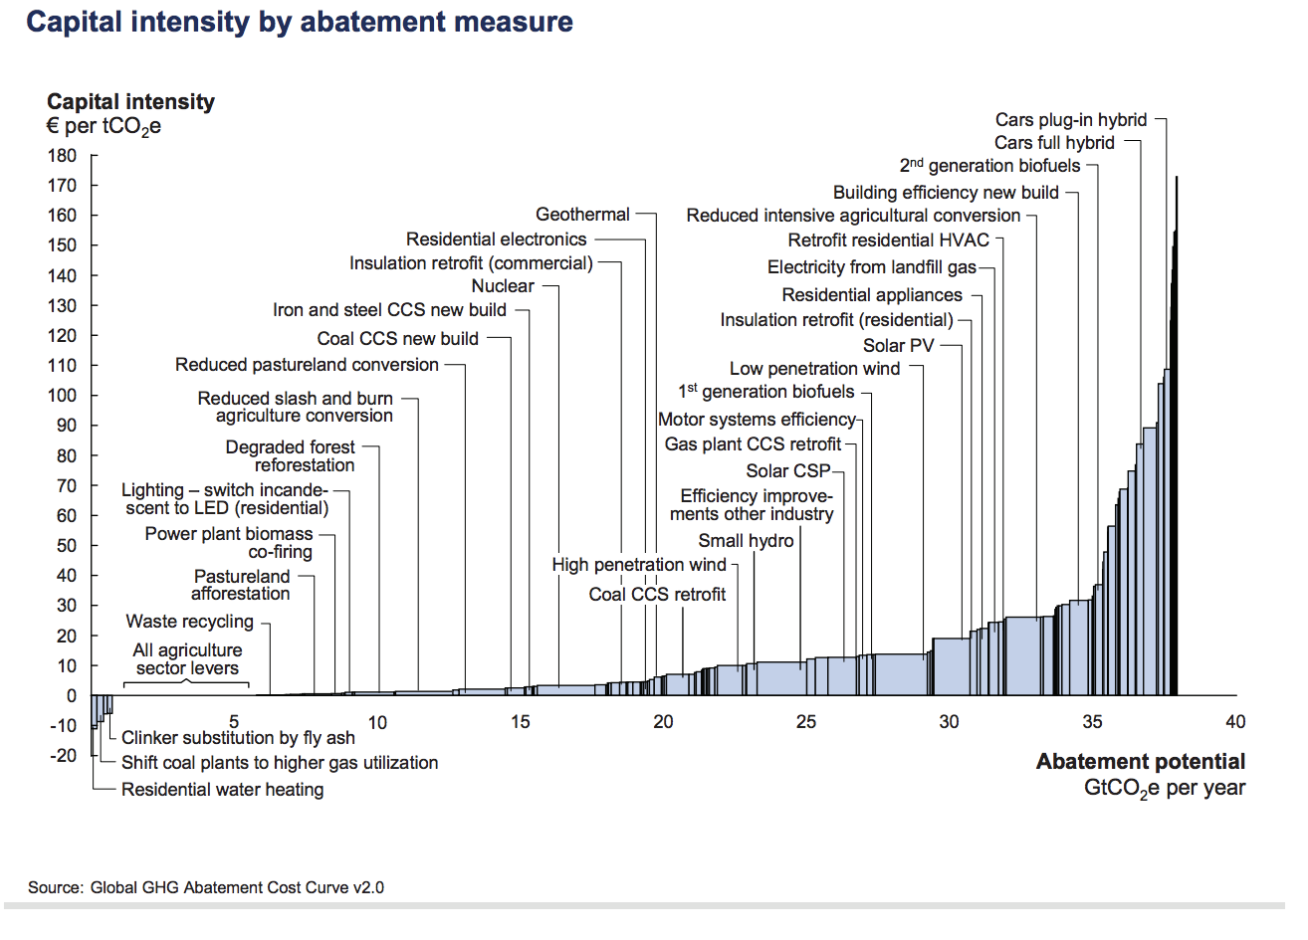

### Limitation 2: Lack of Dynamic Cost Assessment

The most crucial limitations of the MAC curve is its inability to consider **Dynamic Costs**. In 2009, when the MAC was first created, it only considered **Static Costs**. Let's define them within the context of solar energy prices (graph below):
 
#### Static Costs
* The fixed costs of a new intervention, unchanged over a lifetime of an investment. Think of it as the costs you observe from this current point of view in time and expect to pay years ahead. For example, the 1976 Solar Energy Price at +100 USD/Watt.
 
#### Dynamic Costs
* Cost considering potential cost-reduction from increased efficiency, learning-by-doing, and other positive spillovers. For example, the actual cost of Solar Energy in 2019 at below 1 USD/Watt.
 
 
 
As a result of this shortcoming, the MAC curve tends to *overestimate costs* and do not fully represent the required investments within the energy transition (Kesicki and Edwins, 2012; Vogt-Schilb et al., 2015). It is not hard to understand that people were skeptical of investing in solar energy when the static costs were that high! A current example of this is the Carbon Capture & Storage (CCS) intervention: With high static costs, it might look like an unfavourable investment. What would it look like if we took dynamic costs into our calculations?
 
**A final note on the MAC curve:** As future data scientists, we have a responsibility to improve the MAC curve, and use our skills in prediction and analysis to assess dynamic costs in GHG abatement with higher certainty. The original McKinsey MAC has rounded its 10th year anniversary. Perhaps it's time for you to build a new one?

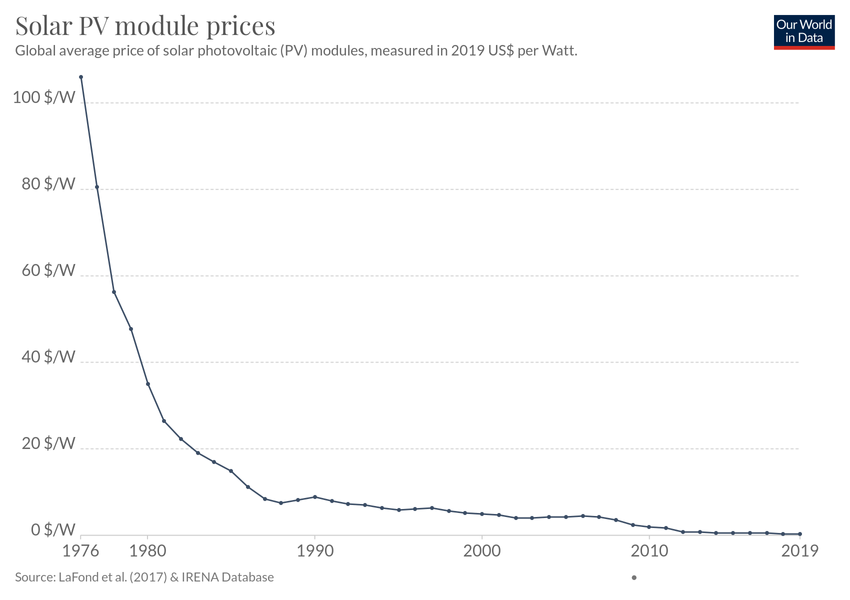

## What's next?

Firstly, thank you for taking your time to explore topics of data science and environmental economics together with us today. We hope you had an interactive learning experience, and that it spurred further interest in the topics discussed. The road ahead is filled with even more fascinating topics, such as finding the social cost of carbon, the valuation of our environment, and the economics of emissions trading. Besides purely economical modeling, the field of environmental data science is rapidly growing as we collect more and more data on our vulnerable planet. Applying the power of Satellite Imagery, Machine Learning, and Geographic Information Systems (GIS), one can follow both a technology and a policy-driven path, both ensured to have a positive impact in shaping a data-informed, sustainable future.

## Further recommended readings:

Levelized Cost of Carbon Abatement: An Improved Cost-Assessment Methodology for a Net-Zero Emissions World (also the main source of this Jupyter Notebook)

https://www.energypolicy.columbia.edu/sites/default/files/file-uploads/LCCA_CGEP-Report_101620.pdf

Dynamic vs. Static costs are described further in in K.Gillingham & J.H Stock's The Cost of Reducing Greenhouse Gas Emissions (italic) from 2018. - A highly recommended reading out of scope for this class.

https://scholar.harvard.edu/files/stock/files/gillingham_stock_cost_080218_posted.pdf

Goldman Sachs Research: Carbonomics: The Future of Energy in the Age of Climate Change
  
https://www.goldmansachs.com/insights/pages/carbonomics.html

EPA article on the Economics of Climate Change:
https://www.epa.gov/environmental-economics/economics-climate-change

Draw your own curve program:
https://tamc.github.io/macc/

Abatement curve for crops:
https://github.com/aj-sykes92/ggmacc/blob/main/README_files/figure-gfm/full-macc-1.png


Aalborg University's software:
https://github.com/matpri/EPLANoptMAC
